### 1. Data Cleaning

FEATURES 

1. Order_ID - The order id details 
2. Products - Name of the Different Product 
3. Electronics - Name of the Category of the product 
4. Price - Price of the Product details
5. Quantity - Quantity of the Product details

In [2]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('amazon_sales.csv')

In [3]:
#read the data
df.head()

,Order_ID,Product,Category,Price,Quantity
0,1,Monitor,NaN,212.0,3.0
1,2,Keyboard,Electronics,101.0,9.0
2,3,Tablet,Accessories,741.0,3.0
3,4,Keyboard,NaN,319.0,NaN
4,5,Keyboard,Gadgets,665.0,2.0


In [4]:
#check for null values
df.isnull().sum()

Order_ID     0
Product     10
Category    10
Price       10
Quantity    10
dtype: int64

In [5]:
df['Product'].unique()

array(['Monitor', 'Keyboard', 'Tablet', 'Phone', nan, 'Laptop'],
      dtype=object)

In [6]:
# Product is the categorical dataset so we find the mode of the data and fill the nan value with mode data
product_mode = df['Product'].mode()[0]
product_mode

'Monitor'

In [7]:
df['Product'].fillna(product_mode,inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1104\280521085.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Product'].fillna(product_mode,inplace=True)


In [8]:
df.isnull().sum()

Order_ID     0
Product      0
Category    10
Price       10
Quantity    10
dtype: int64

In [9]:
# Likewise the product column we also have another categorical column category so we do the same operation
df['Category'].fillna(df['Category'].mode()[0],inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_1104\1292669326.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Category'].fillna(df['Category'].mode()[0],inplace=True)


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order_ID  100 non-null    int64  
 1   Product   100 non-null    object 
 2   Category  100 non-null    object 
 3   Price     90 non-null     float64
 4   Quantity  90 non-null     float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [11]:
#handling the price column null values
df['Price'].unique()

array([212., 101., 741., 319., 665., 954.,  nan, 324., 484., 502., 737.,
       229., 152., 783., 829., 771., 809., 515., 346., 935., 538., 302.,
       283., 222., 500., 866., 393., 379., 936., 983., 709., 297., 610.,
       851., 243., 708., 300., 223., 286., 563., 448., 870., 759., 863.,
       445., 247., 963., 919., 588., 739., 650., 437., 971., 740., 878.,
       572., 250., 514., 397., 710., 362., 723., 671., 980., 996., 403.,
       353., 751., 552., 259., 108., 332., 198., 915., 307., 230., 503.,
       251., 153., 219., 772., 686., 724., 519., 521., 203., 951.])

In [12]:
#so the price is range probably from 100 to 1000 so we use central tendency(mean,median,mode) here the price column as no outliers so we use 
#both mean or median is right choice suppose there is outliers in data we don't go with mean is not right choice

Price_mean = df['Price'].mean()
Price_median = df['Price'].median()
print(Price_mean,Price_median)


546.2555555555556 517.0


In [13]:
df['Price'] = df['Price'].fillna(Price_median)

In [14]:
#Likewise handilng the Quantity column also use by mean and median but if any product has 500 units buy and remaining are 1 to 10 these would affect
#the result of mean so the best practices go with median it is robust to outliers

Quantity_median = df['Quantity'].median()
df['Quantity'] = df['Quantity'].fillna(Quantity_median)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Order_ID  100 non-null    int64  
 1   Product   100 non-null    object 
 2   Category  100 non-null    object 
 3   Price     100 non-null    float64
 4   Quantity  100 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 4.0+ KB


In [16]:
#The price and Quantity should be int for better understand and good practices so change the type of that 2 column

df['Price'] = df['Price'].astype(int)
df['Quantity'] = df['Quantity'].astype(int)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_ID  100 non-null    int64 
 1   Product   100 non-null    object
 2   Category  100 non-null    object
 3   Price     100 non-null    int32 
 4   Quantity  100 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 3.3+ KB


##  Conclusion:
     Now the data should be cleaned and ready to perform EDA (Explorative Data Analysis) and get the valuable insights from the data

### 2.EDA (Explorative Data Anaysis)

#### 2.1 Basic Data Inspection

In [18]:
print(df.info()) #check column types and missing values
print(50*'-')
print(df.isnull().sum()) #Count missing values in each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Order_ID  100 non-null    int64 
 1   Product   100 non-null    object
 2   Category  100 non-null    object
 3   Price     100 non-null    int32 
 4   Quantity  100 non-null    int32 
dtypes: int32(2), int64(1), object(2)
memory usage: 3.3+ KB
None
--------------------------------------------------
Order_ID    0
Product     0
Category    0
Price       0
Quantity    0
dtype: int64


#### 2.2 Summary Statistics

In [19]:
print(df.describe()) #Summary statistics for numerical columns
print(20*'-')
print(df.describe(include='object')) # Summary for categorical columns

         Order_ID       Price    Quantity
count  100.000000  100.000000  100.000000
mean    50.500000  543.330000    4.430000
std     29.011492  248.767307    2.429844
min      1.000000  101.000000    1.000000
25%     25.750000  322.750000    2.750000
50%     50.500000  517.000000    4.000000
75%     75.250000  740.250000    6.000000
max    100.000000  996.000000    9.000000
--------------------
        Product Category
count       100      100
unique        5        3
top     Monitor  Gadgets
freq         32       46


#### 2.3 Univariate Analysis

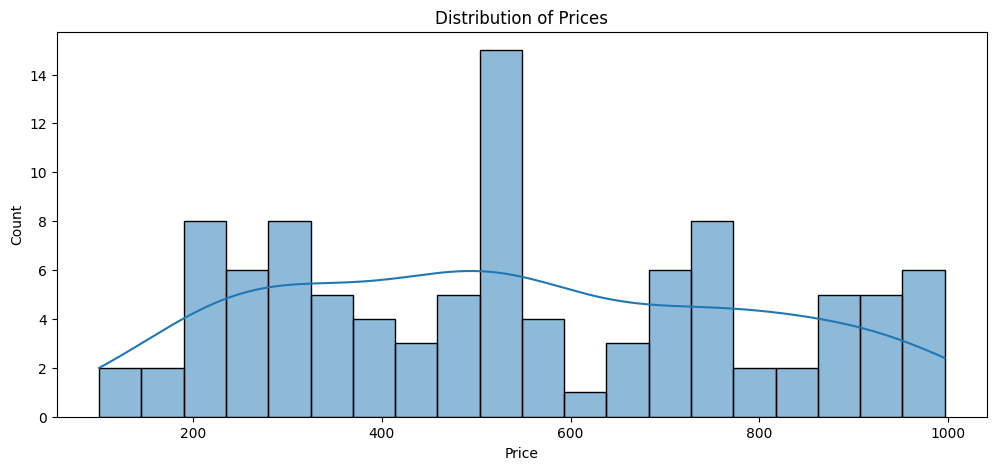

In [25]:
# Distribution of Numerical Columns (Price , Quantity)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.show()

Insights: The Prices are Equally Distributed in the Dataset because the chart represent Normal Distribution instead of Right-Skewed or Left-Skewed Distribution

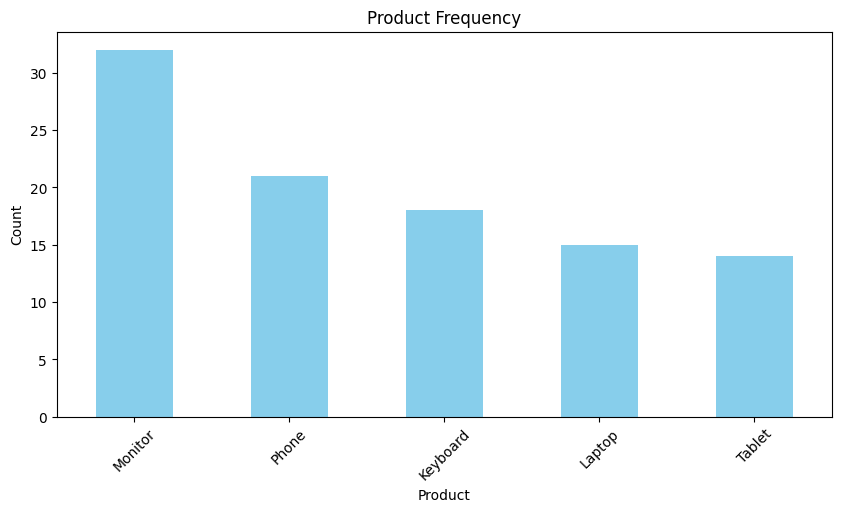

In [21]:
# Bar Chart for Product Frequency

df['Product'].value_counts().plot(kind='bar',figsize=(10,5),color='skyblue')
plt.title('Product Frequency')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Insights: The Most Amazon sales Product is Monitor and the Least Amazon sales prooduct is Tablet

#### 2.4 Bivariate Analysis

In [18]:
df.head()

,Order_ID,Product,Category,Price,Quantity
0,1,Monitor,Gadgets,212,3
1,2,Keyboard,Electronics,101,9
2,3,Tablet,Accessories,741,3
3,4,Keyboard,Gadgets,319,4
4,5,Keyboard,Gadgets,665,2


C:\Users\Admin\AppData\Local\Temp\ipykernel_1104\1342118969.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product', y='Quantity', data=product_quantity, palette='coolwarm')


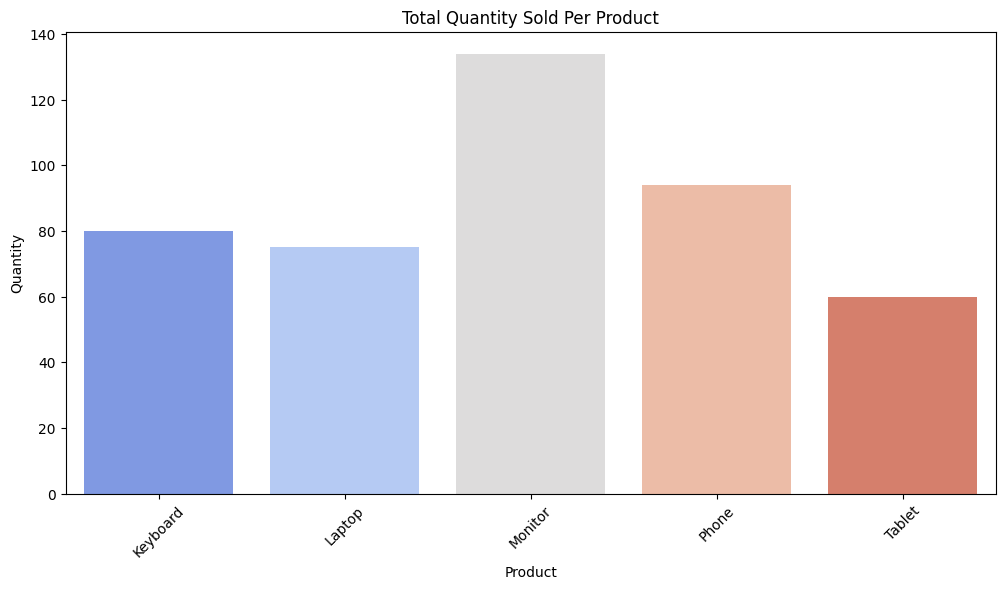

In [28]:
# Product vs Total Quantity Sold (Bar Chart
product_quantity = df.groupby('Product')['Quantity'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Product', y='Quantity', data=product_quantity, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Total Quantity Sold Per Product')
plt.show()


Insights: The Best-selling product is monitor among all the products in Amazon.

<function matplotlib.pyplot.show(close=None, block=None)>

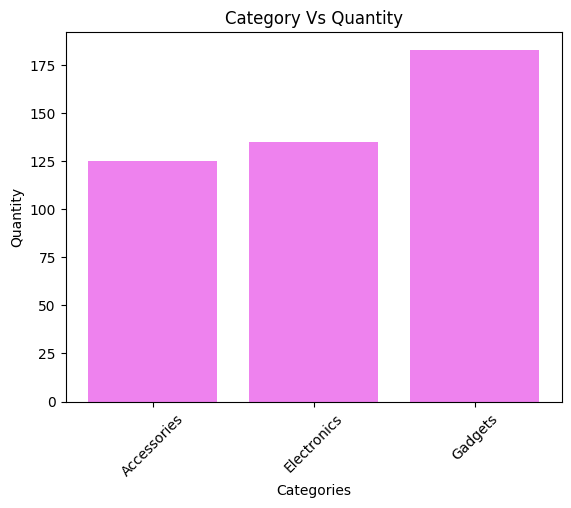

In [41]:
# Total Quantity sold per Category
import matplotlib.pyplot as plt

Category_quantity = df.groupby('Category')['Quantity'].sum().reset_index()
plt.bar(Category_quantity['Category'],Category_quantity['Quantity'],color='violet')
plt.xlabel('Categories')
plt.ylabel('Quantity')
plt.title('Category Vs Quantity')
plt.xticks(rotation=45)
plt.show

Insights: The Most Amazon Sales Product are come under the Gadgets Category.

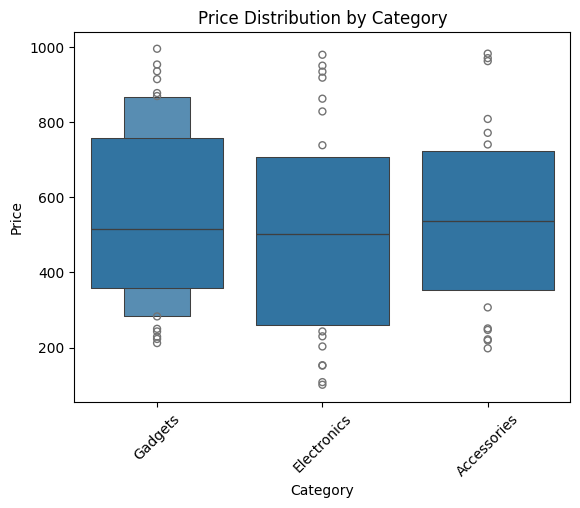

In [42]:
# Box Plot of Price By Category (To detect Outliers)

sns.boxenplot(x=df['Category'],y=df['Price'])
plt.xticks(rotation=45)
plt.title('Price Distribution by Category')
plt.show()

Insights: The Price of Product by Category contains a mix of regular, mid-range, and few expensive products.

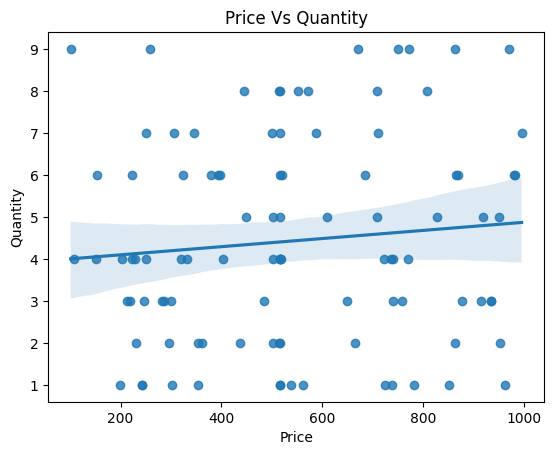

In [35]:
#Price Vs Quantity (Scatter Plot to See Trends)
sns.regplot(x=df['Price'], y=df['Quantity'])
plt.title('Price Vs Quantity')
plt.show()

Insights:
1. Weak Positive Correlation means the regression line shows slight upward trend, suggesting that as price increase, quantity may also slightly increase but relation is not strong
2. High Variability in Quantity means ven at low prices, some products have high quantities while others have low quantities, and the same happens at high prices.
This indicates that price alone is not a strong predictor of quantity sold.


#### 2.5 Correlation Analysis

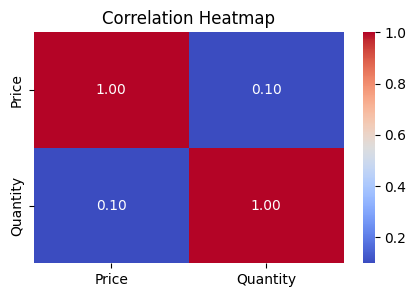

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(5, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

Insights:

1.Weak correlation (0.10) → Price does not strongly influence Quantity sold.

2.Product sales are likely driven by other factors such as product category, demand, or promotions.

#### 2.5 Outlier Detection

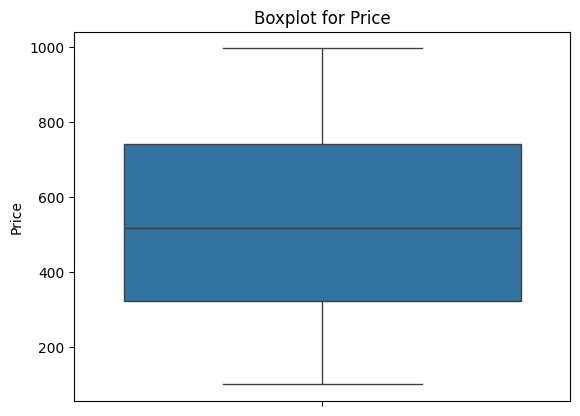

In [46]:
#outlier detection in Price field

sns.boxplot(df['Price'])
plt.title('Boxplot for Price')
plt.show()

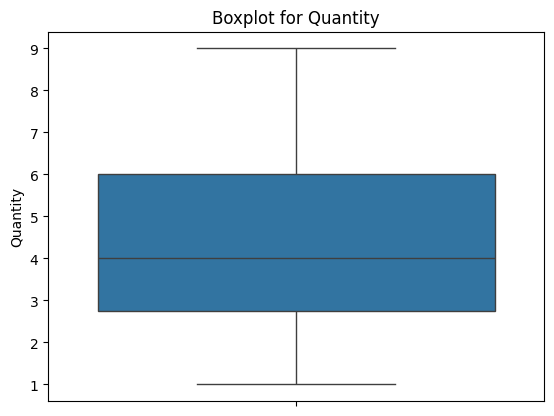

In [48]:
# Outlier Detection in Quantity field
sns.boxplot(df['Quantity'])
plt.title("Boxplot for Quantity")
plt.show()

Insights: Helps to Remove extreme value or predict either any one of product goes high price or quantity sales

#### 2.6 Aggregated Summary Table

In [ ]:
#Aggregated table with mean,max,min of price of category and quantity of category

df.groupby('Category').agg({'Price': ['mean', 'max', 'min'], 'Quantity': 'sum'})


Price           Quantity
                   mean  max  min      sum
Category                                  
Accessories  562.080000  983  198      125
Electronics  503.034483  980  101      135
Gadgets      558.543478  996  212      183

### Insights from Category-Wise Price & Quantity Summary:

1. **Gadgets have the highest total quantity sold (183 units)**
   - This suggests that **Gadgets are the most popular category** in terms of sales volume.  
   - Despite having a similar average price to Accessories, they are sold in larger numbers.  

2. **Accessories have the highest average price (₹562.08)**  
   - This indicates that, on average, **Accessories are slightly more expensive** than Electronics and Gadgets.  
   - However, the minimum price (₹198) shows that some budget-friendly accessories are also available. 